In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler

## Tarefas:

- Mapa: OK

- https://www.kaggle.com/code/camnugent/geospatial-feature-engineering-and-visualization/notebook

- https://geopandas.org/en/stable/gallery/plotting_basemap_background.html

- https://github.com/amitkac/CaliforniaHousing

- Tunar RNA: OK

    - Testar aumentar o lr pra rede maior

    - https://www.kaggle.com/code/bhavinmoriya/regression-using-neural-nets-and-rf-lr-etc

- SHAP

- Obter os MSE corretos OK

- Ajustar a regressão sem cada variável e obter o mse e comparar com os da RNA (média) OK

- Ajustar modelos de Regressão mais completo (stepwise, quadráticas, combinações):OK

    - https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

    - Realizar o monte carlo dos mse

- Criar grafico entre as previsões pela regressão e rna sobrepostos e o gabarito OK

- Criar tabela com pvalor e mse de cada variável nos 3 modelos OK
- paralelizar e gpu
- Treinar XGBoost: OK
    - https://www.kaggle.com/code/joseconomy/california-housing-prices-regression-with-xgboost

    - https://www.kaggle.com/code/megr25/california-houses-neural-network-xgboost

    - https://www.kaggle.com/code/jaggu2529/predict-house-price-xgboost-85-accuracy
    
- deixar gráfico quadrado OK
- treinar modelo stepwise no R
- Criar os mapas curva de nivel ou dispersão com as previsões variando apenas a longitude e latitude OK
- embaralhamento com 10000 reps para o p-valor 
- adicionar 2 variáveis normais OK


### Leitura dos dados

In [139]:
teste = pd.read_csv("housing.csv")
teste.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [2]:
df = pd.read_csv("housing.csv")


### Visualizar os dados

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.dropna(inplace = True)


In [5]:
df.drop(['ocean_proximity'], inplace=True, axis=1)

In [138]:
df.shape

(20433, 11)

### Criando colunas distribuição normal

In [6]:
n = df.shape[0]
df["Norm1"] = np.random.normal(0, 1, size = n)
df["Norm2"] = np.random.normal(0, 1, size = n)

<AxesSubplot:xlabel='Norm1', ylabel='Norm2'>

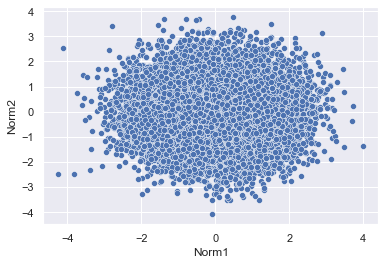

In [7]:
ax = sns.scatterplot(x=df["Norm1"], y=df["Norm2"],alpha = 1)
#ax = sns.scatterplot(x=y_previsto_truncado, y=y_test,alpha = 0.6)
ax

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Norm1,Norm2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-2.396513,-0.427848
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.420500,0.156703
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-0.568846,-1.079128
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-1.553955,0.354024
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-1.174561,-0.175376


In [116]:
california_img=mpimg.imread('map1.jpg')

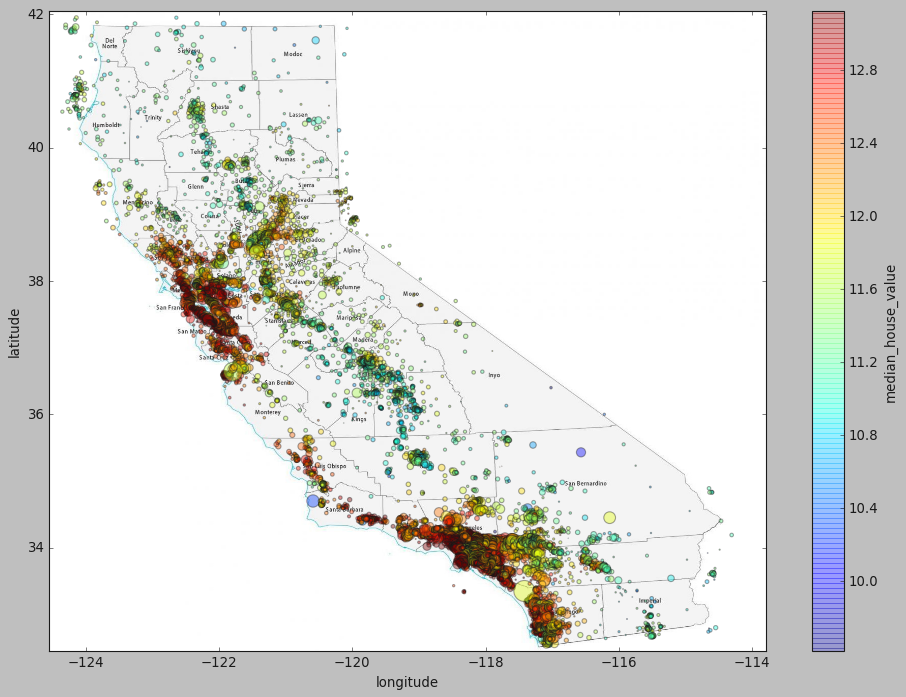

In [130]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=df['population']/100, figsize=(15,10),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)


plt.savefig('mapa_calif.png')

### Transformação log para a variável (y)

In [11]:
df['median_house_value'] = np.log(df['median_house_value'])


### Criando os datasets de Treino e Teste

In [12]:
y = df['median_house_value']
x = df.drop(['median_house_value'],axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)


## Regressão Linear

### Estimando o modelo com statsmodels

In [14]:
X_train_com_constante = sm.add_constant(X_train) #adicionando a constante para trabalhar de forma matricial

In [15]:
X_train_com_constante

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Norm1,Norm2
17727,1.0,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,1.385380,0.024076
2057,1.0,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,-1.106682,0.283248
6453,1.0,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1.113427,0.943993
4619,1.0,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,-0.267285,-0.163774
15266,1.0,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,1.517919,1.565753
...,...,...,...,...,...,...,...,...,...,...,...
11397,1.0,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0.509157,-0.877828
12081,1.0,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,-0.440887,0.870812
5447,1.0,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,-0.871017,-0.820885
866,1.0,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,-0.970802,1.459625


In [140]:
modelo_statsmodel = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()


### Avaliando as Estatísticas de teste do modelo

In [141]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2920.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:04:49   Log-Likelihood:                -5543.7
No. Observations:               16346   AIC:                         1.111e+04
Df Residuals:                   16335   BIC:                         1.119e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.7009      0

In [18]:
print(modelo_statsmodel.summary2().tables[1])

                        Coef.  Std.Err.          t          P>|t|     [0.025  \
const              -11.700873  0.341868 -34.226280  5.185749e-248 -12.370972   
longitude           -0.275091  0.003899 -70.551701   0.000000e+00  -0.282734   
latitude            -0.278928  0.003686 -75.668637   0.000000e+00  -0.286153   
housing_median_age   0.003212  0.000237  13.554169   1.256931e-41   0.002748   
total_rooms         -0.000033  0.000004  -7.503711   6.522416e-14  -0.000041   
total_bedrooms       0.000481  0.000037  12.867960   1.039564e-37   0.000407   
population          -0.000165  0.000006 -28.448038  8.653383e-174  -0.000177   
households           0.000228  0.000040   5.641999   1.708743e-08   0.000149   
median_income        0.177906  0.001842  96.572782   0.000000e+00   0.174295   
Norm1               -0.000381  0.002646  -0.143998   8.855041e-01  -0.005567   
Norm2                0.007457  0.002650   2.814075   4.897624e-03   0.002263   

                       0.975]  
const  

In [19]:
teste = 0.002663 * df['Norm1']- 0.002671*df["Norm2"]
teste.describe()

count    20433.000000
mean         0.000014
std          0.003794
min         -0.017795
25%         -0.002527
50%          0.000035
75%          0.002557
max          0.014242
dtype: float64

In [20]:
y_train.describe()

count    16346.000000
mean        12.084819
std          0.567129
min          9.615739
25%         11.689397
50%         12.101268
75%         12.482947
max         13.122365
Name: median_house_value, dtype: float64

## Estimando o modelo com dados de treino

### Normalizando os dados

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Treinando o modelo com sklearn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [23]:
modelo = LinearRegression()

In [24]:
modelo.fit(X_train, y_train)

LinearRegression()

### Fazendo previsões para os dados de teste

In [25]:
y_previsto = modelo.predict(X_test)
y_previsto_truncado = np.where(y_previsto > np.log(500001), np.log(500001), y_previsto)

In [26]:
R2_reg = metrics.r2_score(y_test, y_previsto_truncado).round(3)
#mse_REG = mean_squared_error(y_test, y_previsto_truncado)
mse_REG = np.square(np.subtract(y_test, y_previsto_truncado)).mean()

## Redes Neurais

In [27]:
import tensorflow as tf
import keras
from keras import backend as K

### Criando a função de R2

In [28]:
#R2 função

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### Modelo escolhido sem validação

In [29]:
n_hidden = 300
n_outputs = 1 


model_RNA = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu"),
   
    keras.layers.Dense(n_outputs) 
])

model_RNA.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))

In [30]:
history = model_RNA.fit( X_train, y_train, 
                    epochs=30,
                    verbose = 1
                    )

Epoch 1/30
511/511 [==============================] - 2s 3ms/step - loss: 5.6611
Epoch 2/30
511/511 [==============================] - 1s 3ms/step - loss: 0.7239
Epoch 3/30
511/511 [==============================] - 2s 3ms/step - loss: 0.4207
Epoch 4/30
511/511 [==============================] - 2s 3ms/step - loss: 0.2971
Epoch 5/30
511/511 [==============================] - 2s 3ms/step - loss: 0.2455
Epoch 6/30
511/511 [==============================] - 2s 3ms/step - loss: 0.2167
Epoch 7/30
511/511 [==============================] - 2s 3ms/step - loss: 0.2001
Epoch 8/30
511/511 [==============================] - 1s 3ms/step - loss: 0.1795
Epoch 9/30
511/511 [==============================] - 2s 3ms/step - loss: 0.1569
Epoch 10/30
511/511 [==============================] - 2s 3ms/step - loss: 0.1412
Epoch 11/30
511/511 [==============================] - 2s 3ms/step - loss: 0.1299
Epoch 12/30
511/511 [==============================] - 2s 3ms/step - loss: 0.1208
Epoch 13/30
511/511 [====

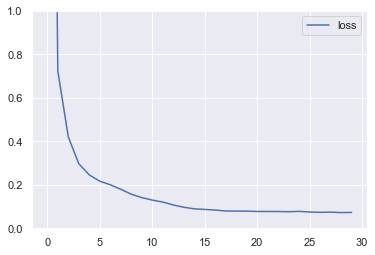

In [31]:
pd.DataFrame( history.history, columns=history.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

### MSE dos dados de teste e R2

### Fazendo previsões com os dados de teste

In [32]:
y_pred = model_RNA.predict(X_test).flatten()
y_pred_truncado = np.where(y_pred > np.log(500001),np.log(500001),y_pred )

128/128 [==============================] - 0s 835us/step


In [33]:
mse_RNA = mean_squared_error(y_test, y_pred_truncado)
r2_RNA =  metrics.r2_score(y_test,y_pred_truncado).round(3)

### XGBoost

In [34]:
import xgboost as xgb

In [35]:
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2200)

In [36]:
xg_model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2200,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
y_pred_xg = xg_model.predict(X_test)
mse_xg = mean_squared_error(y_test,y_pred_xg).round(3)


#### Realizando o truncamento

In [38]:
y_pred_xg_truncado = np.where(y_pred_xg > np.log(500001),np.log(500001),y_pred_xg )

mse_xg_truncado = mean_squared_error(y_test,y_pred_xg_truncado)
r2_xg_truncado =  metrics.r2_score(y_test,y_pred_xg_truncado).round(3)

### Comparação Regressão x RNA x XGBoost

In [39]:
linha_MSE = [[mse_REG, mse_RNA, mse_xg_truncado]]
df_MSE_geral = pd.DataFrame(linha_MSE, columns=["Regressão", "Rede Neural", "XGBoost"])
df_MSE_geral = df_MSE_geral.rename_axis('MSE')

In [40]:
linha_R2 = [[R2_reg, r2_RNA, r2_xg_truncado]]
df_R2_geral = pd.DataFrame(linha_R2, columns=["Regressão", "Rede Neural", "XGBoost"])
df_R2_geral = df_R2_geral.rename_axis('R2')

### Mse de cada modelo

In [41]:
df_MSE_geral

,Regressão,Rede Neural,XGBoost
MSE,,,
0,0.112683,0.073742,0.060603


### R2 de cada modelo

In [42]:
df_R2_geral

,Regressão,Rede Neural,XGBoost
R2,,,
0,0.662,0.779,0.818


<AxesSubplot:xlabel='Valor real', ylabel='Regressão - Previsão'>

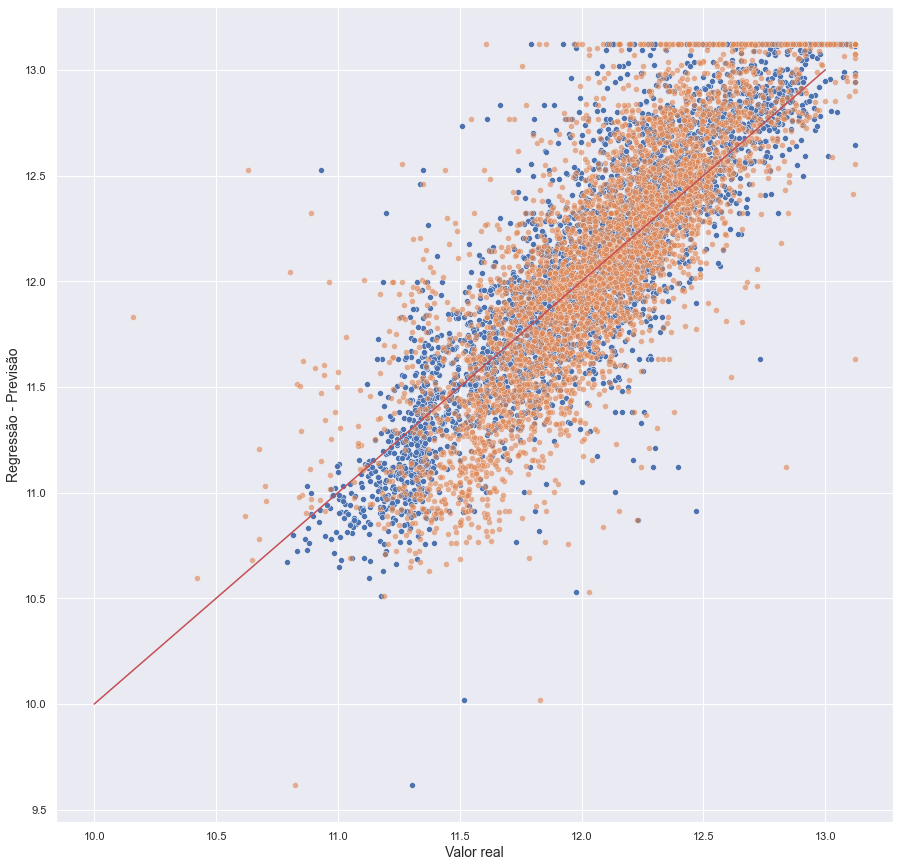

In [43]:
xlims=(10,13)
ylims=(10,13)

ax = sns.scatterplot(x=y_pred_truncado, y=y_test,alpha = 1)
ax = sns.scatterplot(x=y_previsto_truncado, y=y_test,alpha = 0.6)
#ax = sns.scatterplot(x=y_pred_xg_truncado, y=y_test,alpha = 0.4)
#ax = sns.scatterplot(x=y_previsto_sw_truncado, y=y_test,alpha = 0.4)
ax.plot(xlims,xlims, color='r')
ax.figure.set_size_inches(15,15)
ax.set_xlabel('Valor real', fontsize=14)
ax.set_ylabel('Regressão - Previsão', fontsize=14)
ax


In [44]:
colunas = df.columns.drop('median_house_value')

In [45]:
df_mapa_real = pd.DataFrame(X_test,columns = colunas)
df_mapa_real['price'] = list(y_test)

df_mapa_reg = pd.DataFrame(X_test,columns = colunas)
df_mapa_reg['price'] = list(y_previsto_truncado)

df_mapa_rna = pd.DataFrame(X_test,columns = colunas)
df_mapa_rna['price'] = list(y_pred_truncado )

df_mapa_xgb = pd.DataFrame(X_test,columns = colunas)
df_mapa_xgb['price'] = list(y_pred_xg)

In [46]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
%matplotlib inline




def plot_contour(x,y,z,resolution = 50,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z



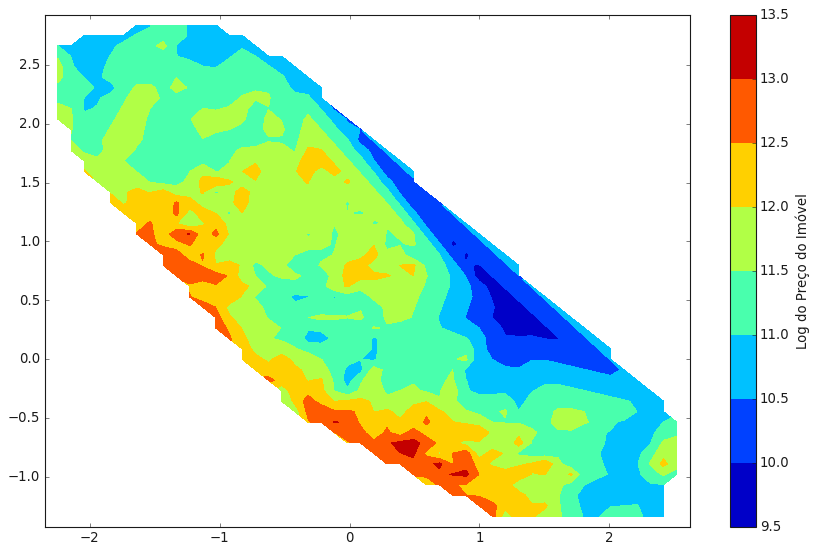

In [131]:
x = df_mapa_real['longitude'].values
y = df_mapa_real['latitude'].values
z = df_mapa_real['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)

cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('valores_reais.png')

In [48]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

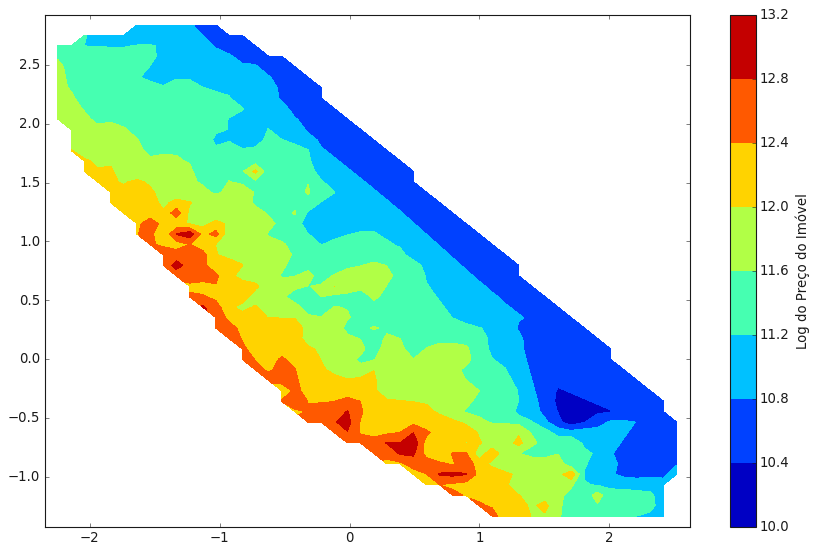

In [132]:
x = df_mapa_reg['longitude'].values
y = df_mapa_reg['latitude'].values
z = df_mapa_reg['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)


cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('Previsoes_reg.png')

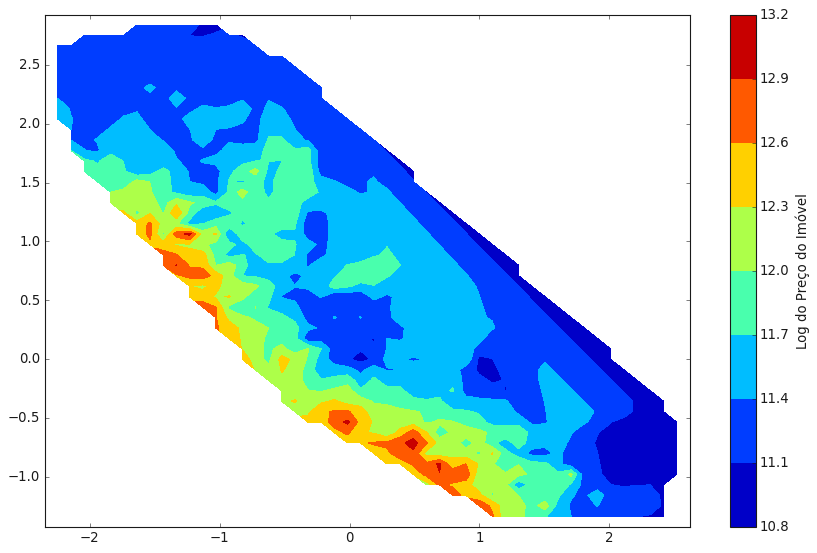

In [133]:
x = df_mapa_rna['longitude'].values
y = df_mapa_rna['latitude'].values
z = df_mapa_rna['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)


cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('Previsoes_rna.png')

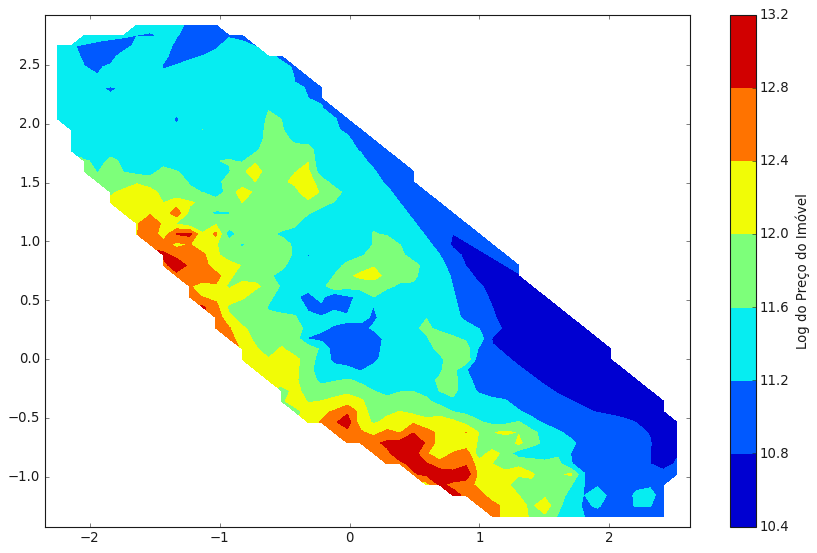

In [134]:
x = df_mapa_xgb['longitude'].values
y = df_mapa_xgb['latitude'].values
z = df_mapa_xgb['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)


cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('Previsoes_XGBoost.png')

In [52]:
medias = df.copy()
medias.drop(['latitude','longitude','median_house_value'],axis=1,inplace = True)
pd.DataFrame(medias.mean().values)

,0
0,28.633094
1,2636.504233
2,537.870553
3,1424.946949
4,499.433465
5,3.871162
6,-0.004708
7,-0.010056


In [53]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'Norm1', 'Norm2'],
      dtype='object')

In [54]:
media_housing_median_age = df.housing_median_age.mean()
media_total_rooms = df.total_rooms.mean()
media_total_bedrooms = df.total_bedrooms.mean()
media_population = df.population.mean()
media_households = df.households.mean()
media_median_income = df.median_income.mean()
media_norm1 = df.Norm1.mean()
media_norm2 = df.Norm2.mean()

In [55]:
X_media = df.copy()
X_media.drop(['median_house_value'],axis=1,inplace = True)
X_media['housing_median_age']= media_housing_median_age
X_media['total_rooms']= media_total_rooms
X_media['total_bedrooms']= media_total_bedrooms
X_media['population']= media_population
X_media['households']= media_households
X_media['median_income']= media_median_income
X_media['Norm1']= media_norm1
X_media['Norm2']= media_norm2
X_media

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Norm1,Norm2
0,-122.23,37.88,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
1,-122.22,37.86,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
2,-122.24,37.85,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
3,-122.25,37.85,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
4,-122.25,37.85,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
20636,-121.21,39.49,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
20637,-121.22,39.43,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056
20638,-121.32,39.43,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,-0.004708,-0.010056


In [56]:
X_media = scaler.fit_transform(X_media)

In [57]:
y_previsto_media = modelo.predict(X_media)
y_previsto_truncado_media = np.where(y_previsto_media > np.log(500001), np.log(500001), y_previsto_media)

y_pred_media = model_RNA.predict(X_media).flatten()
y_pred_truncado_media = np.where(y_pred_media > np.log(500001),np.log(500001),y_pred_media )

y_pred_xg_media = xg_model.predict(X_media)
y_pred_xg_truncado_media = np.where(y_pred_xg_media > np.log(500001),np.log(500001),y_pred_xg_media )

639/639 [==============================] - 1s 931us/step


In [58]:

df_mapa_reg_media = pd.DataFrame(X_media,columns = colunas)
df_mapa_reg_media['price'] = list(y_previsto_truncado_media)

df_mapa_rna_media = pd.DataFrame(X_media,columns = colunas)
df_mapa_rna_media['price'] = list(y_pred_truncado_media )

df_mapa_xgb_media = pd.DataFrame(X_media,columns = colunas)
df_mapa_xgb_media['price'] = list(y_pred_xg_media)

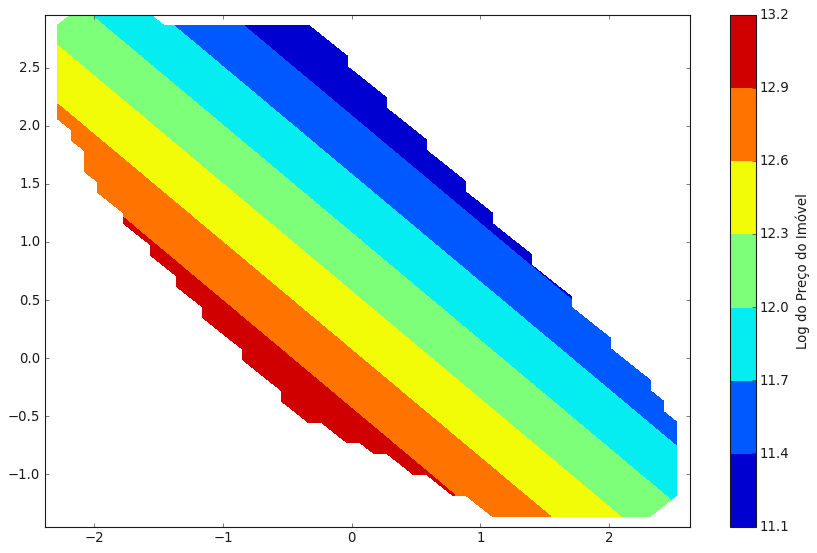

In [135]:
x = df_mapa_reg_media['longitude'].values
y = df_mapa_reg_media['latitude'].values
z = df_mapa_reg_media['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)


cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('Previsoes_reg_latlong.png')

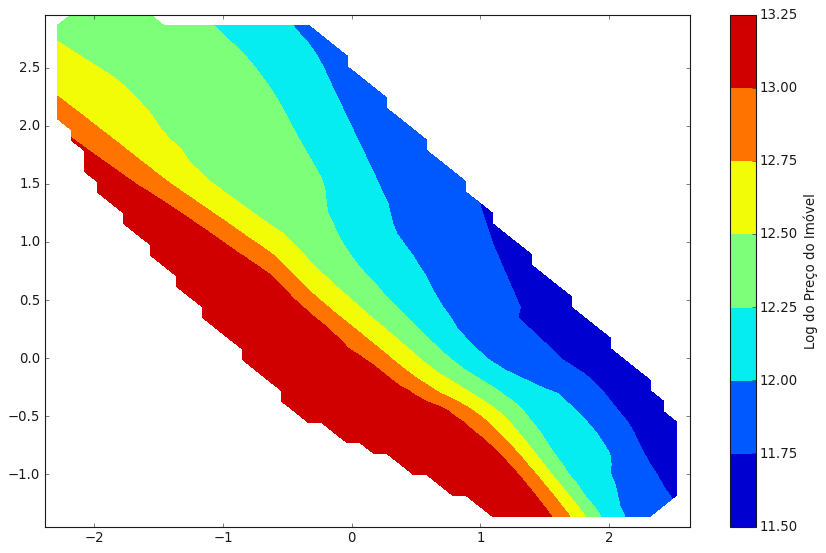

In [137]:
x = df_mapa_rna_media['longitude'].values
y = df_mapa_rna_media['latitude'].values
z = df_mapa_rna_media['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)


cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('Previsoes_rna_latlong.png')

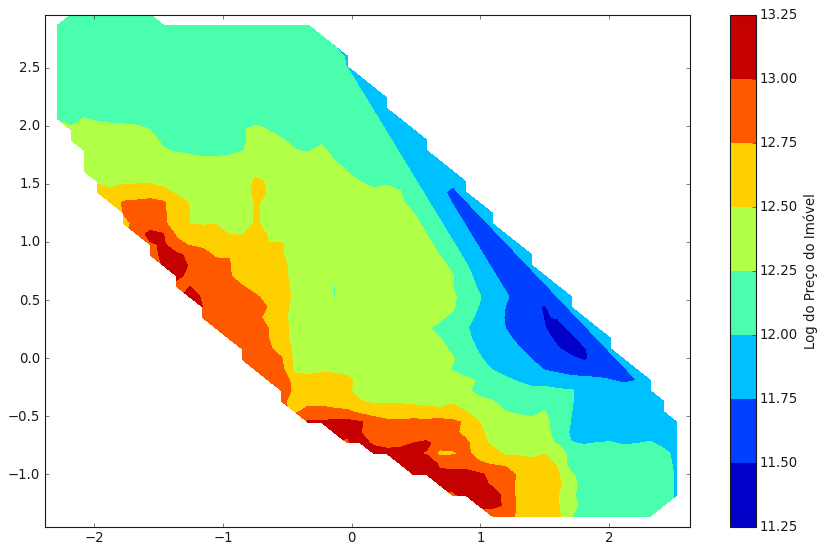

In [136]:
x = df_mapa_xgb_media['longitude'].values
y = df_mapa_xgb_media['latitude'].values
z = df_mapa_xgb_media['price'].values

X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13,8))
fig.patch.set_facecolor('#FFFFFF')
mapa = ax.contourf(X,Y,Z)


cbar = plt.colorbar(mapa)
cbar.set_label('Log do Preço do Imóvel')
plt.savefig('Previsoes_XGBoost_latlong.png')

### Testando variáveis embaralhamento

In [62]:
def MSE(model,x,y):
    if model == model_RNA:
        y_pred = model.predict(x,verbose = 0).flatten()
        
    else:
        y_pred = model.predict(x).flatten()
    
    y_pred_truncado = np.where(y_pred > np.log(500001),np.log(500001),y_pred)
    mse = mean_squared_error(y,y_pred_truncado)
    
    return mse
    

def embaralhar(x,col):
    data = np.copy(x)
    temp = np.array(data[:,col])
    np.random.shuffle(temp)
    data[:,col] = temp
    return data

def MSE_embaralhado(x,y,model,col):
   
    x_embaralhado = embaralhar(x,col)
    mse = MSE(model,x_embaralhado, y)
    
    return mse

def repeticoes(x, y, model, col, mse_real, size=1):

    vetor_repeticoes = np.empty(size)

    for i in range(size):
        vetor_repeticoes[i] = MSE_embaralhado(x,y,model,col)
        
    p =  pvalor(vetor_repeticoes, mse_real)  

    return vetor_repeticoes, p

def pvalor(valores_simulados,mse_real):
    
    p = np.sum(valores_simulados <= mse_real)  / len(valores_simulados)
    #print(f'p-value = {p}')
    return p

### Comparando MSE - RNA X Regressão x XGBoost

In [63]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'Norm1', 'Norm2'],
      dtype='object')

In [64]:
linhas_MSE = [[ 
           repeticoes( X_test, y_test, modelo, i,mse_REG, size = 1000)[0].mean().round(3),
           repeticoes( X_test, y_test, model_RNA, i,mse_RNA, size = 1000)[0].mean().round(3),
           repeticoes( X_test, y_test, xg_model, i,mse_xg_truncado, size = 1000)[0].mean().round(3)] for i in range(colunas.size)]

df_MSE = pd.DataFrame(linhas_MSE, columns=["Regressão", "Rede Neural", "XGBoost"])
df_MSE = df_MSE.set_index(colunas)
df_MSE = df_MSE.rename_axis('Variáveis')

In [65]:
df_MSE

,Regressão,Rede Neural,XGBoost
Variáveis,,,
longitude,0.634,0.335,0.318
latitude,0.747,0.403,0.388
housing_median_age,0.116,0.090,0.066
total_rooms,0.120,0.121,0.074
total_bedrooms,0.189,0.106,0.079
population,0.173,0.161,0.097
households,0.129,0.148,0.064
median_income,0.335,0.238,0.210
Norm1,0.113,0.074,0.061


In [66]:
linhas_p = [[  
           repeticoes( X_test, y_test, modelo, i,mse_REG, size = 1000)[1].mean().round(4),
           repeticoes( X_test, y_test, model_RNA, i,mse_RNA, size = 1000)[1].mean().round(4),
           repeticoes( X_test, y_test, xg_model, i,mse_xg_truncado, size = 1000)[1].mean().round(4)] for i in range(colunas.size)]

df_p = pd.DataFrame(linhas_p, columns=["Regressão", "Rede Neural", "XGBoost"])
df_p = df_p.set_index(colunas)
df_p = df_p.rename_axis('Variáveis')

pvalor_reg = ["{:.3f}".format(float(x)) for x in modelo_statsmodel.pvalues][1:]


In [114]:
df_p

,Regressão,Rede Neural,XGBoost
Variáveis,,,
longitude,0.000,0.000,0.000
latitude,0.000,0.000,0.000
housing_median_age,0.000,0.000,0.000
total_rooms,0.000,0.000,0.000
total_bedrooms,0.000,0.000,0.000
population,0.000,0.000,0.000
households,0.000,0.000,0.000
median_income,0.000,0.000,0.000
Norm1,0.150,0.067,0.060


In [68]:
df_MSE

,Regressão,Rede Neural,XGBoost
Variáveis,,,
longitude,0.634,0.335,0.318
latitude,0.747,0.403,0.388
housing_median_age,0.116,0.090,0.066
total_rooms,0.120,0.121,0.074
total_bedrooms,0.189,0.106,0.079
population,0.173,0.161,0.097
households,0.129,0.148,0.064
median_income,0.335,0.238,0.210
Norm1,0.113,0.074,0.061


## SHAP

In [69]:
import shap

### SHAP Regressão

In [93]:
masker = shap.maskers.Independent(data = X_train)

explainer_reg = shap.LinearExplainer(model=modelo, masker = masker)

# Fit the explainer on a subset of the data (you can try all but then gets slower)
shap_values_reg = explainer_reg.shap_values(X=X_train[:500])

vetor_reg = [np.array(x) for x in shap_values_reg]
shap_reg = [np.mean(np.absolute(k)) for k in zip(*vetor_reg)]

### SHAP RNA

In [71]:

# create an instance of the DeepSHAP which is called DeepExplainer
explainer_rna = shap.DeepExplainer(model=model_RNA,
                                 data=X_train)

# Fit the explainer on a subset of the data (you can try all but then gets slower)
shap_values_rna = explainer_rna.shap_values(X=X_train[:500],
                                      ranked_outputs=True)

vetor_RNA = [np.array(x) for x in shap_values_rna[0][0]]
shap_RNA = [np.mean(np.absolute(k)) for k in zip(*vetor_RNA)]

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


### SHAP XGboost

In [87]:

# create an instance of the DeepSHAP which is called DeepExplainer
explainer_xgb = shap.Explainer(model=xg_model)

# Fit the explainer on a subset of the data (you can try all but then gets slower)
shap_values_xgb = explainer_xgb.shap_values(X=X_train[:500])

vetor_xgb = [np.array(x) for x in shap_values_xgb]
shap_xgb = [np.mean(np.absolute(k)) for k in zip(*vetor_xgb)]


In [99]:
shap_xgb

[0.20679066,
 0.25129765,
 0.016529843,
 0.033413064,
 0.0471624,
 0.0820499,
 0.01170183,
 0.22488488,
 0.0049546533,
 0.0056054704]

In [100]:
df_shap = pd.DataFrame(list(zip(shap_reg,shap_RNA,shap_xgb)),columns = ['SHAP Regressão','SHAP RNA','SHAP XGBoost'])
df_shap = df_shap.set_index(colunas)
df_shap = df_shap.rename_axis('Variáveis')

In [104]:
df_shap.round(3)


,SHAP Regressão,SHAP RNA,SHAP XGBoost
Variáveis,,,
longitude,0.500,0.376,0.207
latitude,0.548,0.434,0.251
housing_median_age,0.033,0.031,0.017
total_rooms,0.042,0.062,0.033
total_bedrooms,0.131,0.056,0.047
population,0.119,0.161,0.082
households,0.057,0.091,0.012
median_income,0.252,0.160,0.225
Norm1,0.000,0.005,0.005


In [ ]:
#df_MSE.drop(['Valores SHAP','Coef. Regressão'],axis = 1)

In [111]:
df_reg = pd.DataFrame(list(zip(modelo.coef_,pvalor_reg)),columns = ['Coeficientes Regressão','p-valor'])
df_reg = df_reg.set_index(colunas)
df_reg

,Coeficientes Regressão,p-valor
longitude,-0.551788,0.000
latitude,-0.595822,0.000
housing_median_age,0.040401,0.000
total_rooms,-0.070470,0.000
total_bedrooms,0.200682,0.000
population,-0.186556,0.000
households,0.086362,0.000
median_income,0.337624,0.000
Norm1,-0.000383,0.886
Norm2,0.007481,0.005
